Today there are no certain methods by using which we can predict whether there will be rainfall today or not. Even the meteorological department’s prediction fails sometimes. In this article, we will learn how to build a machine-learning model which can predict whether there will be rainfall today or not based on some atmospheric factors. This problem is related to Rainfall Prediction using Machine Learning because machine learning models tend to perform better on the previously known task which needed highly skilled individuals to do so. 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

full_data = pd.read_csv('Rainfall.csv')
full_data.head()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')


In [6]:
full_data=pd.read_csv("weatherAus.csv")

In [7]:
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
full_data.shape


(145460, 23)

In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

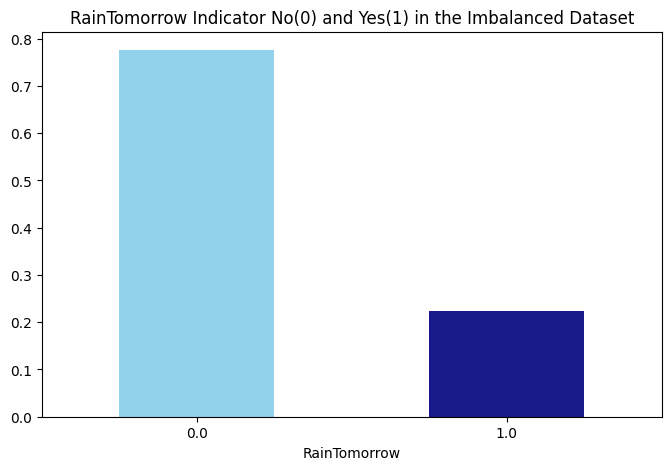

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

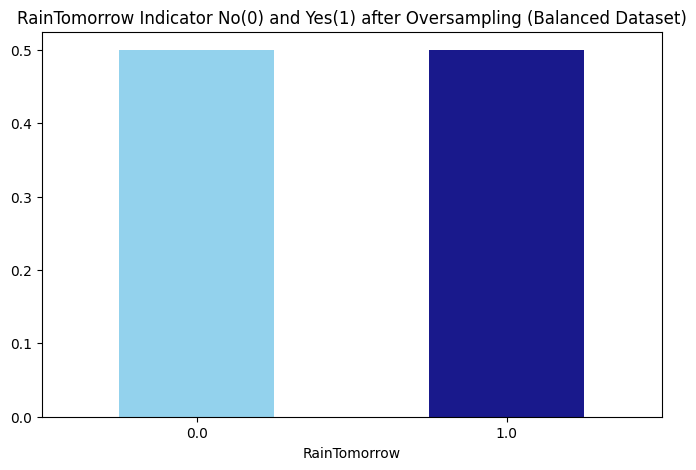

In [12]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [13]:
oversampled.select_dtypes(include=['object']).columns


Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [14]:
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])


In [15]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [18]:
full_data = full_data.dropna()

In [45]:
full_data['Date'] = pd.to_datetime(full_data['Date']).astype(int)

In [48]:
le = LabelEncoder()
full_data['Location'] = le.fit_transform(full_data['Location'])
full_data['WindGustDir'] = le.fit_transform(full_data['WindGustDir'])
full_data['WindDir9am'] = le.fit_transform(full_data['WindDir9am'])
full_data['WindDir3pm'] = le.fit_transform(full_data['WindDir3pm'])


In [49]:
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,1230768000000000000,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0
6050,1230854400000000000,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0
6052,1231027200000000000,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0
6053,1231113600000000000,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0
6054,1231200000000000000,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0


In [50]:

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  int64  
 1   Location       56420 non-null  int64  
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  int64  
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  int64  
 10  WindDir3pm     56420 non-null  int64  
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

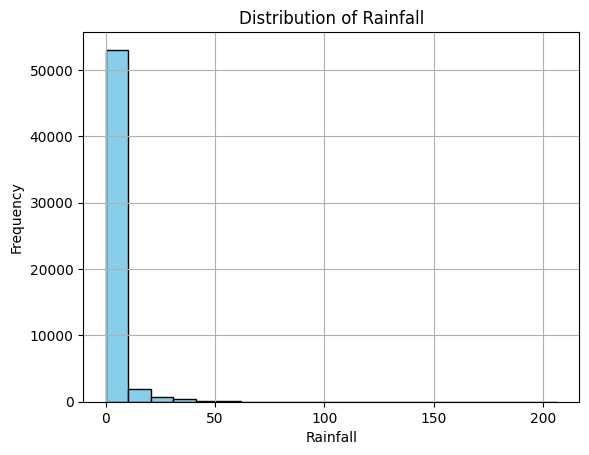

In [56]:

plt.hist(full_data['Rainfall'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [51]:
X = full_data.drop(columns=['RainTomorrow'])
y = full_data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
svc=SVC()
xgb=XGBClassifier()
lr=LogisticRegression()

svc.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression()

In [53]:
svc_predictions = svc.predict(X_test)
xgb_predictions = xgb.predict(X_test)
lr_predictions = lr.predict(X_test)


In [54]:
predictions_df = pd.DataFrame({
    'SVC Prediction': svc_predictions,
    'XGB Prediction': xgb_predictions,
    'LR Prediction': lr_predictions,
    'Actual': y_test
})

print(predictions_df)

        SVC Prediction  XGB Prediction  LR Prediction  Actual
47050              0.0               0            0.0     1.0
139158             0.0               0            0.0     0.0
23488              0.0               0            0.0     0.0
32117              0.0               0            0.0     0.0
122837             0.0               0            0.0     0.0
...                ...             ...            ...     ...
65843              0.0               0            0.0     0.0
100882             0.0               0            0.0     0.0
70986              0.0               0            0.0     1.0
39109              0.0               0            0.0     0.0
12891              0.0               0            0.0     0.0

[11284 rows x 4 columns]


In [55]:
from sklearn.metrics import accuracy_score
svc_accuracy = accuracy_score(y_test, svc_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Accuracy for SVC:", svc_accuracy)
print("Accuracy for XGBClassifier:", xgb_accuracy)
print("Accuracy for LogisticRegression:", lr_accuracy)


Accuracy for SVC: 0.7797766749379652
Accuracy for XGBClassifier: 0.8650301311591634
Accuracy for LogisticRegression: 0.7797766749379652
